# Zipf Distribution for Mining Tonnage Models

### Notes

Merriam et al (2004) described the problem of success in resource assessment of mining and petroleum. Distributions of
oil- and gas-field size in Kansas, the occurrence of historic earthquakes that affected the state, were estimated by means
of Zipf law. Some limits of Zipf law are discussed too.

Daniel F. Merriam, Lawrence J. Drew, and John H. Schuenemeyer (2004). Zipf’s Law: A Viable Geological Paradigm?. *Natural Resources Research, 13*(4), 265-271.

Howarth, R.J. White, M.C. & Koch, G.S. (1980) On Zipf's Law applied to resource prediction. *Transactions of the Institution of Mining and Metallurgy, Section A: Mining Technology*.

Rowlands, N.J. & Sampe, D. (1977). Zipf's Law-An aid to resource inventory prediction in partially explored areas. *Mathematical Geology, 9*(4), 383-391.




### ToDo

* Calculate the limit of distribution in order to control the theorical number of deposits considered. At present the limit is imposed at 50 deposits

* Do not include Tonn values == 0


In [242]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox

## Theorical Distribution

In [255]:
# Data input
style = {'description_width': 'initial'}

l1 = widgets.Label(value="Input Parameters for Theorical Zipf Distribution Calculation")

maxTonnValue    = widgets.BoundedIntText(
    value       = 83000000,
    min         = 0,
    max         = 1000000000,
    step        = 1,
    description = 'Maximun Metric Tonnes:',
    disabled    = False,
    style       = style
)

maxNumberOfSteps = widgets.BoundedIntText(
    value       =40,
    min         =0,
    max         =10000,
    step        =1,
    description ='Steps:',
    disabled    =False,
    style       = style
)

VBox([l1, HBox([maxTonnValue, maxNumberOfSteps])])


In [230]:
def ZipfDistTheorical(maxTonnVal ,maxNumOfSteps ):
    '''
    Obtain a theorical distribution of a mineral deposit type based on the maximun tonneage.
    maxTonnVal    = maximun tonneage
    maxNumOfSteps = maximun number of deposits considered
    '''
    DistZipf = []
    
    r = 0.8
    c = maxTonnVal
    funcRange = range(1, maxNumOfSteps)

    for i in funcRange:

        zipfResult = c / (i ** r)

        DistZipf.append(zipfResult)
    
    return DistZipf


def ZipfDistMinMax(MaxToneage, MinToneage):
    '''
    Obtain a theorical distribution of a mineral deposit type based on the maximun and minimun tonneage.
    MaxToneage    = maximun tonneage
    MinToneage    = minimun tonneage
    '''
    DistZipf = []
    
    r = 0.8
    c = MaxToneage
    
    zipfResult = MaxToneage
    count      = 1
    while True:
        if count > 50 or zipfResult < MinToneage :
            print("Break at count %s and MT = %s" % (count, zipfResult))
            
            break

        zipfResult = c / (count ** r)
        count += 1

        DistZipf.append(zipfResult)
    
    return DistZipf


def DepositZipfRanking(DepModelTonnLst):
    '''
    Generate a ranking based on a corresponding Zipf theorical distribution for a
    deposit model
    
    #ZipfDist        = a theorical Zipf Distribution based on a deposit model
    DepModelTonnLst = a real deposit model distribution 
    '''
    r = 0.8
    c = max(DepModelTonnLst)
    
    ZipfRanksLst = []
    for i in DepModelTonnLst:
        
        rank = (c / i) ** (1 / r)
        ZipfRanksLst.append((round(rank),i))
        
        
    return ZipfRanksLst
    

In [133]:
DistZipf = ZipfDistTheorical(maxTonnValue.value, maxNumberOfSteps.value)

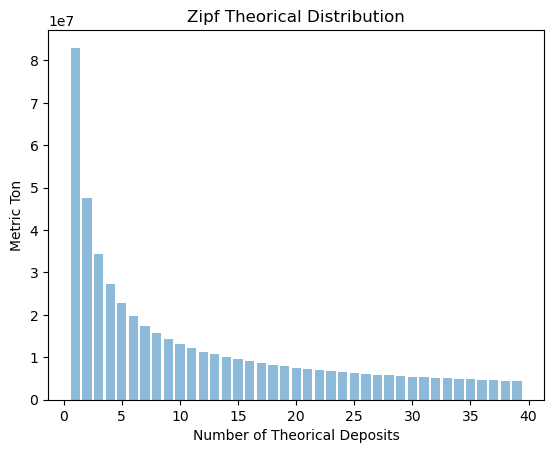

In [143]:
x = [*range(1, len(DistZipf) + 1,1)]

plt.bar(x, DistZipf, align='center', alpha=0.5)

plt.ylabel('Metric Ton')
plt.xlabel('Number of Theorical Deposits')
plt.title('Zipf Theorical Distribution')

plt.show()

In [114]:
print(f'Minimun calculated tonnage: {(DistZipf[-1]):,.0f} MT')
print(f'Maximun calculated tonnage: {(DistZipf[0]):,.0f} MT')
print(f'Total theorical tonnage: {np.sum(DistZipf):,.0f} MT')

Minimun calculated tonnage: 4,428,192 MT
Maximun calculated tonnage: 83,000,000 MT
Total theorical tonnage: 497,388,206 MT


## Prototype-Zipf Tonne Distribution Against World Mineral DataBases

La idea es poder comparar las bases de datos mundiales con la distribución teórica



In [115]:
import pandas as pd

In [116]:
#yacModel = pd.read_csv("data/25c.csv", index_col='yacName')
yacModel = pd.read_csv("data/25c.csv")

In [130]:
# Obtención de la serie por abundancia de Au

result = yacModel['Au'] * yacModel['tonn']
result.sort_values(ascending=False, inplace=True)

DepositMaxToneage = max(result)
DepositMinToneage = min(result)
DepositNumber     = len(result)

print("Maximun Toneage   : %s MT" % (DepositMaxToneage))
print("Minimun Toneage   : %s MT" % (DepositMinToneage))
print("Number of Deposits: %s" % (DepositNumber))

Maximun Toneage   : 25696.0 MT
Minimun Toneage   : 18.0 MT
Number of Deposits: 41


In [171]:
DistZipf = ZipfDistMinMax(25696.0 , 1000)

Break at count 51 and MT = 1123.8012740818588


In [231]:
pepe = DepositZipfRanking(result)



In [232]:
pepe = pepe[0:15]

In [233]:
len(DistZipf)

50

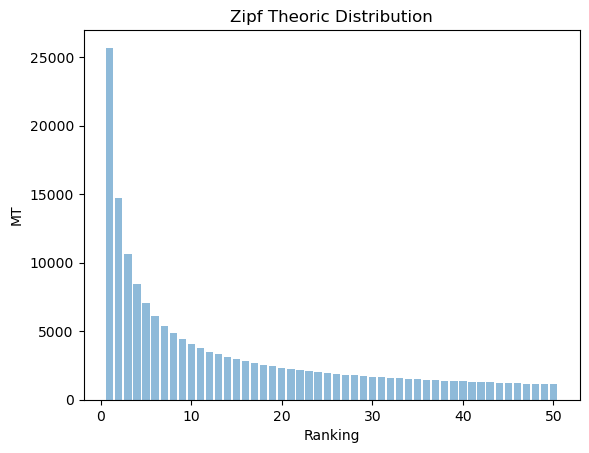

In [234]:
x = [*range(1, len(DistZipf) + 1,1)]

plt.bar(x, DistZipf, align='center', alpha=0.5)

plt.ylabel('MT')
plt.xlabel('Ranking')
plt.title('Zipf Theoric Distribution')

plt.show()

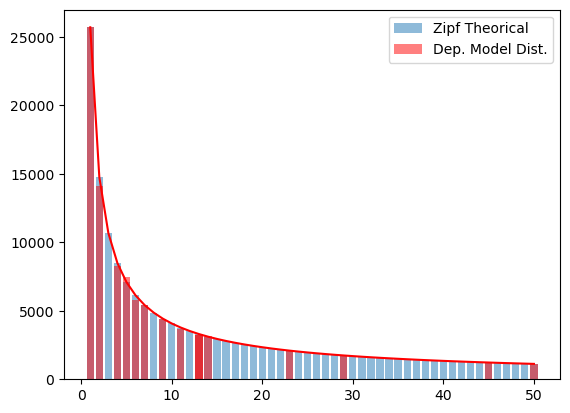

In [235]:
fig, ax = plt.subplots()

x = [*range(1, len(DistZipf) + 1,1)]

ZipfTheoryDistPltBar = ax.bar(x, DistZipf, align='center', alpha=0.5, label='Zipf Theorical')

DepModelDistPltBar   = ax.bar(list(zip(*pepe))[0], list(zip(*pepe))[1], align='center', alpha=0.5, color='red', label="Dep. Model Dist.")

ZipfTheoryDistPltBar = ax.plot(x,DistZipf, 'r')

ax.legend(loc="upper right")


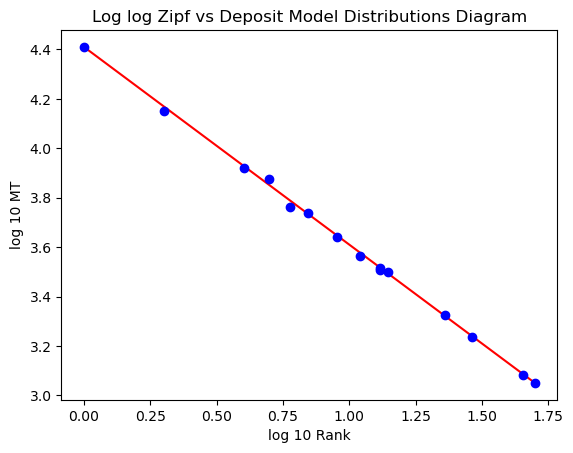

In [240]:
plt.plot(np.log10(x), np.log10(DistZipf), 'r-')
plt.plot(np.log10(list(zip(*pepe))[0]), np.log10(list(zip(*pepe))[1]), 'bo')


plt.ylabel('log 10 MT')
plt.xlabel('log 10 Rank')
plt.title('Log log Zipf vs Deposit Model Distributions Diagram')

plt.show()

# TESTING IN DEVELOPMENT

In [318]:
# Trying to be more generic

yacModelsFileLst = glob.glob("data/*.csv")

style = {'description_width': 'initial'}

yacModelWidget = widgets.Dropdown(
    options     = yacModelsFileLst,
    description = 'Deposit Models',
    style       = style
)

yacModelWidget

#ToDo Analyze and Select elements

Dropdown(description='Deposit Models', options=('data\\15a.csv', 'data\\22c.csv', 'data\\25a.csv', 'data\\25b.…

In [358]:
yacModel = pd.read_csv(yacModelWidget.value)

yacModelColumnsLst = yacModel.columns.to_list()

style2 = {'description_width': '150px'}

l2 = widgets.Label(value="Select Tonneage and Element Columns")

yacTonnWidget = widgets.Dropdown(
    options     = yacModelColumnsLst,
    description = 'Select Tonneage Item',
    style       = style2
)

yacElemWidget = widgets.Dropdown(
    options     = yacModelColumnsLst,
    description = 'Select Element Item ',
    style       = style2
)

VBox([l2, yacTonnWidget, yacElemWidget])

In [361]:
elementName = yacElemWidget.value
yacTonModelByElem = yacModel[yacTonnWidget.value] * yacModel[elementName]
yacTonModelByElem.sort_values(ascending=False, inplace=True)

DepositMaxToneage = max(yacTonModelByElem)
DepositMinToneage = min(yacTonModelByElem)
DepositNumber     = len(yacTonModelByElem)

print("Maximun Toneage   : %s MT" % (DepositMaxToneage))
print("Minimun Toneage   : %s MT" % (DepositMinToneage))
print("Number of Deposits: %s deposit evaluated" % (DepositNumber))

Maximun Toneage   : 27793.2 MT
Minimun Toneage   : 65.3844 MT
Number of Deposits: 17 deposit evaluated


In [362]:
DistZipf = ZipfDistTheorical(DepositMaxToneage,50)

In [364]:
DepositDistByRanking = DepositZipfRanking(yacTonModelByElem)

In [365]:
#[x for x in t if type(x) == type(1)]

DepositDistByRanking = [x for x in DepositDistByRanking if x[0] <= 50]

In [366]:
DepositDistByRanking

[(1, 27793.2),
 (4, 9918.8),
 (4, 8860.41),
 (5, 7870.0599999999995),
 (8, 5310.0),
 (9, 4762.719999999999),
 (11, 4042.44),
 (17, 2833.73),
 (28, 1950.48),
 (49, 1242.59)]

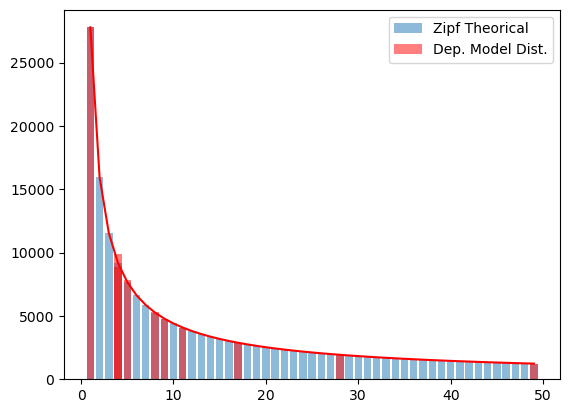

In [367]:
fig, ax = plt.subplots()

x = [*range(1, len(DistZipf) + 1,1)]

ZipfTheoryDistPltBar = ax.bar(x, DistZipf, align='center', alpha=0.5, label='Zipf Theorical')

DepModelDistPltBar   = ax.bar(list(zip(*DepositDistByRanking))[0], list(zip(*DepositDistByRanking))[1], align='center', alpha=0.5, color='red', label="Dep. Model Dist.")

ZipfTheoryDistPltBar = ax.plot(x,DistZipf, 'r')

ax.legend(loc="upper right")

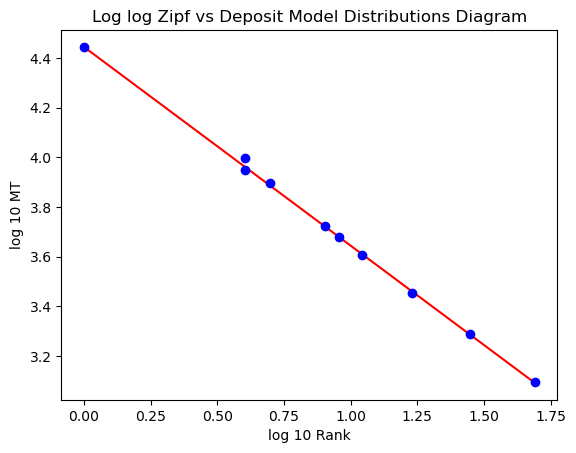

In [368]:
plt.plot(np.log10(x), np.log10(DistZipf), 'r-')
plt.plot(np.log10(list(zip(*DepositDistByRanking))[0]), np.log10(list(zip(*DepositDistByRanking))[1]), 'bo')


plt.ylabel('log 10 MT')
plt.xlabel('log 10 Rank')
plt.title('Log log Zipf vs Deposit Model Distributions Diagram')

plt.show()